# Customers Hotel Review using Sentiment Analysis

### Anirudh Mehrortra


Hotel Reviews ( URL: http://kavita-ganesan.com/entity-ranking-data/ )
- Dataset Description 
- Full reviews of hotels in 10 different cities (Dubai, Beijing, London, New York City, New Delhi, San 
Francisco, Shanghai, Montreal, Las Vegas, Chicago)
- There are about 80-700 hotels in each city 
- Extracted fields include date, review title and the full review
- Total number of reviews: ~259,000


I aim to do sentiment analysis via different algorithms on various Hotel Review

### Project overview:
##### Comprehensive Exploration and Analysis of Hotel Reviews: From Data Consolidation to Sentiment Analysis , Classification with Machine Learning

The project involves the analysis of a comprehensive dataset comprising hotel reviews across various countries and states. Initially, the data from multiple files has been consolidated into a single CSV file. Basic preprocessing steps have been applied to clean and format the data. Labels have been assigned to facilitate the utilization of classification methods.

To gain insights into the dataset, data exploration has been conducted, focusing on key features such as reviews, labels, sentiment scores, hotel names, city, and date. The distribution of sentiments across these features has been visualized to better understand the composition of the dataset.

Subsequently, an attempt was made to apply unsupervised learning through K-means clustering. However, the results were found to be unsatisfactory, indicating that the reviews were not effectively distributed among the clusters, possibly due to the vast size of the dataset.

In response to this limitation, the project shifted its focus to sentiment analysis methods for text classification. Two popular vectorization techniques, namely the Bag of Words approach using Count Vectorizer and TF-IDF Vectorizer, were employed for feature extraction.

Several classification algorithms were then implemented and analyzed for sentiment classification. These algorithms include Logistic Regression, Decision Tree, Random Forest, AdaBoost, and Ridge Classifier. The performance and effectiveness of each algorithm were evaluated to determine the most suitable approach for the sentiment analysis task.

By leveraging these various techniques and algorithms, the project aims to enhance the understanding of the sentiment distribution within the hotel review dataset and identify the most effective method for sentiment classification in the context of the specific data characteristics.

### Importing Libraries

In [6]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from numpy import nan
from io import StringIO
import os
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score, multilabel_confusion_matrix, balanced_accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.utils import resample
from IPython.display import Image 
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anirudh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Anirudh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


#### Preprocessing stage of combining all review’s files to a single csv file

In [87]:
#Helper function to split strings into hotel_name
def split_location(location_string):
    parts = location_string.split('_')   
    if len(parts) >= 3:
        hotel_name = ' '.join(parts[2:]).capitalize()
        return hotel_name
    else:
        # Handle the case where the input string doesn't have enough parts
        return None

Read All the Hotel  review files across all cities folder and merge them into a single CSV

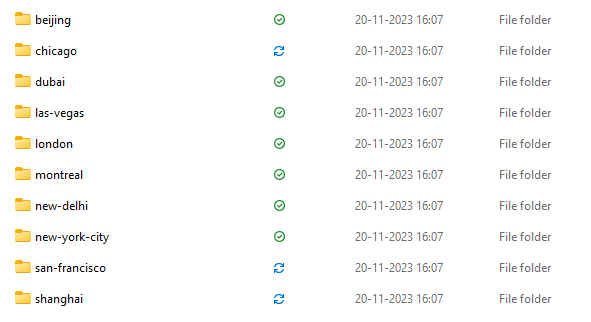

In [11]:
path = r"C:\Users\Anirudh\Desktop\All Quarters\Quarter 4\Programming Machine Learning Applications\Project\OpinRankDataset\hotels"
root_directory = path
# Create an empty DataFrame to store all reviews
colnames = ['City','File_name','Hotel','Date', 'Title', 'Review']
df2 = pd.DataFrame(columns=colnames)
all_reviews_df = pd.DataFrame(columns=colnames)

In [12]:
# Iterate over country folders
for city_folder in os.listdir(root_directory):
    city_path = os.path.join(root_directory, city_folder)
    
    # Check if it's a directory
    if os.path.isdir(city_path):
        # Iterate over all files within each country
        for file_name in os.listdir(city_path):
            file_path = os.path.join(city_path, file_name)
            
            # Check if it's a file
            if os.path.isfile(file_path):
                try:
                    with open(file_path, 'r', encoding='utf-8') as file:
                        content = file.read()
                        # Read the content into a DataFrame
                        df = pd.read_csv(StringIO(content), delimiter='\t', header=None, encoding='utf-8', names=['Date','Title', 'Review','Sentiment'])
                        df['City'] = city_folder
                        df['File_name'] = file_name
                        hotel_name = split_location(file_name)
                        df['Hotel'] = hotel_name
                        # Concatenate the DataFrame to the overall DataFrame
                        #all_reviews_df = pd.concat([all_reviews_df, df], ignore_index=True)
                        all_reviews_df = pd.concat([all_reviews_df, df], ignore_index=True)
                except Exception as e:
                    print(f"Error reading {file_path}: {e}")
# Save the combined reviews DataFrame to a CSV file
output_csv_path = os.path.join(path, "hotelscombined_reviews.csv")

all_reviews_df.to_csv(output_csv_path, index=False)

print(f"Combined reviews saved to {output_csv_path}")

Combined reviews saved to C:\Users\Anirudh\Desktop\All Quarters\Quarter 4\Programming Machine Learning Applications\Project\OpinRankDataset\hotelscombined_reviews.csv


In [14]:
# Load the data
data = pd.read_csv('hotelshotelscombined_reviews.csv')
data

,City,File_name,Hotel,Date,Title,Review,Sentiment
0,beijing,china_beijing_aloft_beijing_haidian,Aloft beijing haidian,Oct 12 2009,Nice trendy hotel location not too bad.,I stayed in this hotel for one night. As this ...,NaN
1,beijing,china_beijing_aloft_beijing_haidian,Aloft beijing haidian,Sep 25 2009,Great Budget Hotel!,Stayed two nights at Aloft on the most recent ...,NaN
2,beijing,china_beijing_aloft_beijing_haidian,Aloft beijing haidian,Aug 4 2009,Excellent value - location not a big problem.,We stayed at the Aloft Beijing Haidian for 5 n...,NaN
3,beijing,china_beijing_aloft_beijing_haidian,Aloft beijing haidian,Jul 17 2009,Stylish clean reasonable value poor location,I am glad to be the first person to post photo...,NaN
4,beijing,china_beijing_aloft_beijing_haidian,Aloft beijing haidian,May 30 2009,Remote but excellent value for money,Stayed there for one night. The hotel is locat...,NaN
...,...,...,...,...,...,...,...
5248,beijing,china_beijing_zhong_an_inn_zhong_an_hotel,Zhong an inn zhong an hotel,May 4 2009,ottimo rapporto qualità/prezzo,NaN,NaN
5249,beijing,china_beijing_zhong_an_inn_zhong_an_hotel,Zhong an inn zhong an hotel,Sep 23 2008,???????????,NaN,NaN
5250,beijing,china_beijing_zhong_an_inn_zhong_an_hotel,Zhong an inn zhong an hotel,Aug 28 2008,Economico e perfetto!,NaN,NaN
5251,beijing,china_beijing_zhong_an_inn_zhong_an_hotel,Zhong an inn zhong an hotel,Jun 15 2008,Voll Zufrieden,NaN,NaN


In [15]:
# Dropping unnecessary columns
df = data[['City','File_name','Hotel','Date','Title','Review','Sentiment']]

Using VADER Library to do sentiment analysis and add labels i.e. Positive, Negative or Neutral sentiment of the Review of Hotel

In [17]:
#loading sentiment Analyzer
sid = SentimentIntensityAnalyzer()
# Run the polarity score on the entire dataset
review = ''
for index, row in df.iterrows():
    review = str(row['Review'])
    score = sid.polarity_scores(review)['compound']
    if score == 0:
        review = str(row['Title'])
        score = sid.polarity_scores(review)['compound']
    if score >= 0.05:
        label = "Positive"
    elif score <= -0.05:
        label = "Negative"
    else:
        label = "Neutral"
    df.at[index,'Review'] = review
    df.at[index,'Sentiment'] = score
    df.at[index,'Label'] = label

In [18]:
output_csv_path = "combined_reviews_sentiment.csv"
df.to_csv(output_csv_path, index=False)
print(f"Combined reviews saved to {output_csv_path}")

Combined reviews saved to combined_reviews_sentiment.csv


### Data Cleansing

In [91]:
#Read saved CSV
df=pd.read_csv('combined_reviews_sentiment.csv',low_memory=False)
# Dropping unnecessary columns
df = df[['City','File_name','Hotel','Date','Title','Review','Sentiment','Label']]

In [92]:
print(df.isnull().sum())

City             0
File_name       10
Hotel          765
Date          1612
Title          791
Review       26472
Sentiment       64
Label           72
dtype: int64


In [93]:
categories = ['Positive','Negative', 'Neutral']
df = df[df['Sentiment'] != 0]
df = df[df['Sentiment'] != np.nan]
df = df[df['Label'].isin(categories)]
df['Hotel'].fillna(df['Hotel'].mode()[0], inplace=True)
df['Title'].fillna(df['Title'].mode()[0], inplace=True)
df['Label'].fillna(df['Label'].mode()[0], inplace=True)
df['Review'].fillna('', inplace=True)  # Filling missing values in 'Review' with an empty string

In [94]:
print(df.isnull().sum())

City            0
File_name       0
Hotel           0
Date         1580
Title           0
Review          0
Sentiment       0
Label           0
dtype: int64


We can ignore Date column, as we are mainly focusing on Review, Sentiment and Label columns

In [51]:
RANDOM_STATE = 42
subset_size = 20000

In [52]:
# Use scikit-learn's resample function to create a random sample
df = resample(df, n_samples=subset_size, replace=True, random_state=RANDOM_STATE)

In [53]:
print(df.isnull().sum())

City           0
File_name      0
Hotel         74
Date         129
Title         74
Review         0
Sentiment      0
Label          0
dtype: int64


In [54]:
# Clean up column names
df.columns = [col.replace('\t', ' ') for col in df.columns]

### Data Exploration and Visualization

In [56]:
# Data exploration and visualization
from matplotlib import rcParams

# Set a font that includes the necessary glyphs
rcParams['font.sans-serif'] = 'Arial'

# EDA 1: Top 10 Hotels and their labels
top_n_hotels = df['Hotel'].value_counts().nlargest(10).index
df_top = df[df['Hotel'].isin(top_n_hotels)]

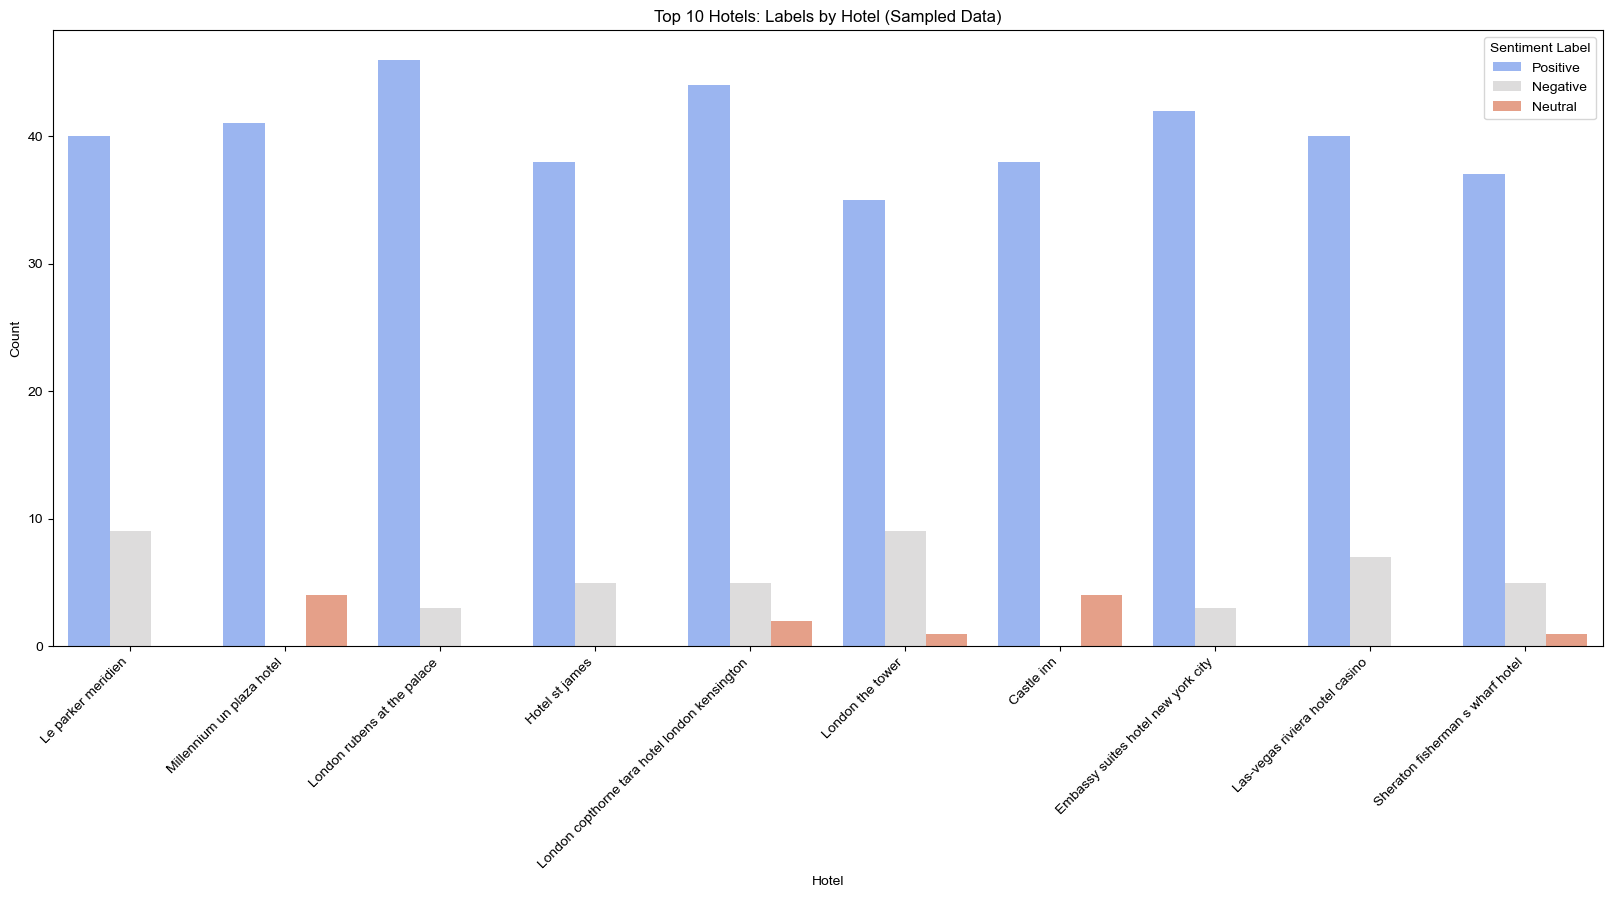

In [57]:
plt.figure(figsize=(20, 8))
sns.countplot(x='Hotel', hue='Label', data=df_top, palette='coolwarm')
plt.title('Top 10 Hotels: Labels by Hotel (Sampled Data)')
plt.xlabel('Hotel')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment Label')
plt.show()

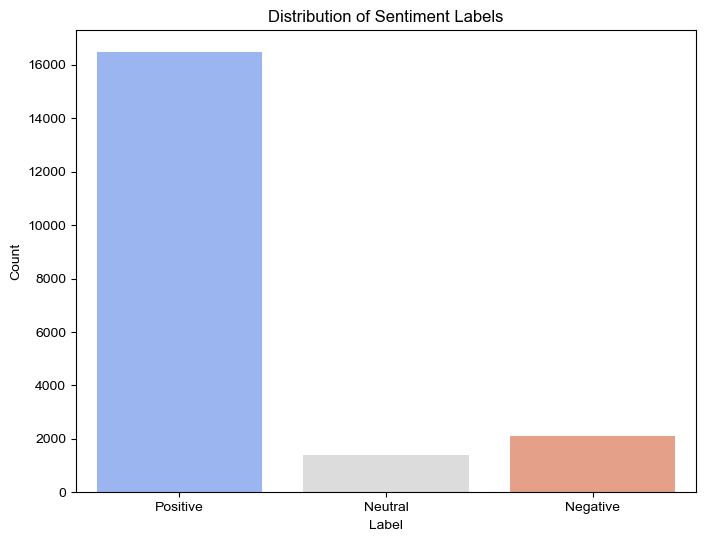

In [58]:
# EDA 2: Distribution of Sentiment Labels
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=df, palette='coolwarm', order=['Positive', 'Neutral', 'Negative'])
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

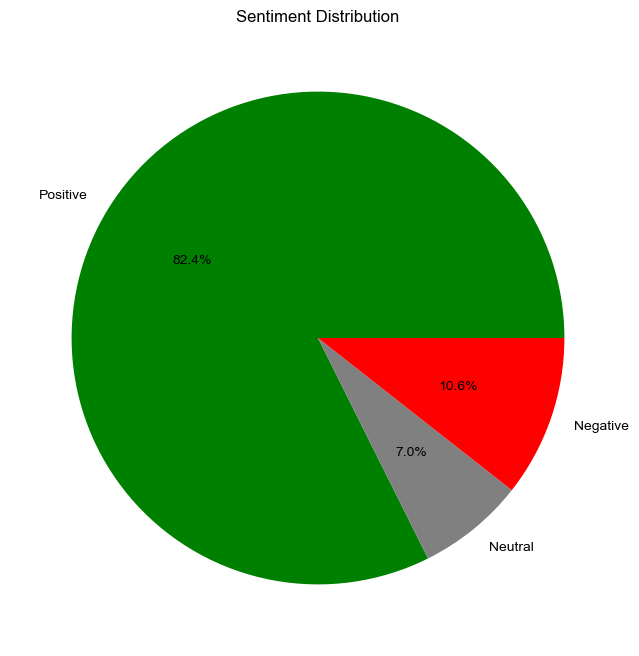

In [59]:
# EDA 3: Sentiment Distribution Pie Chart
sentiment_distribution = df['Label'].value_counts()
filtered_sentiment_distribution = sentiment_distribution.loc[['Positive', 'Neutral', 'Negative']]
plt.figure(figsize=(8, 8))
plt.pie(filtered_sentiment_distribution, labels=filtered_sentiment_distribution.index, autopct='%1.1f%%', colors=['green', 'gray', 'red'])
plt.title('Sentiment Distribution')
plt.show()

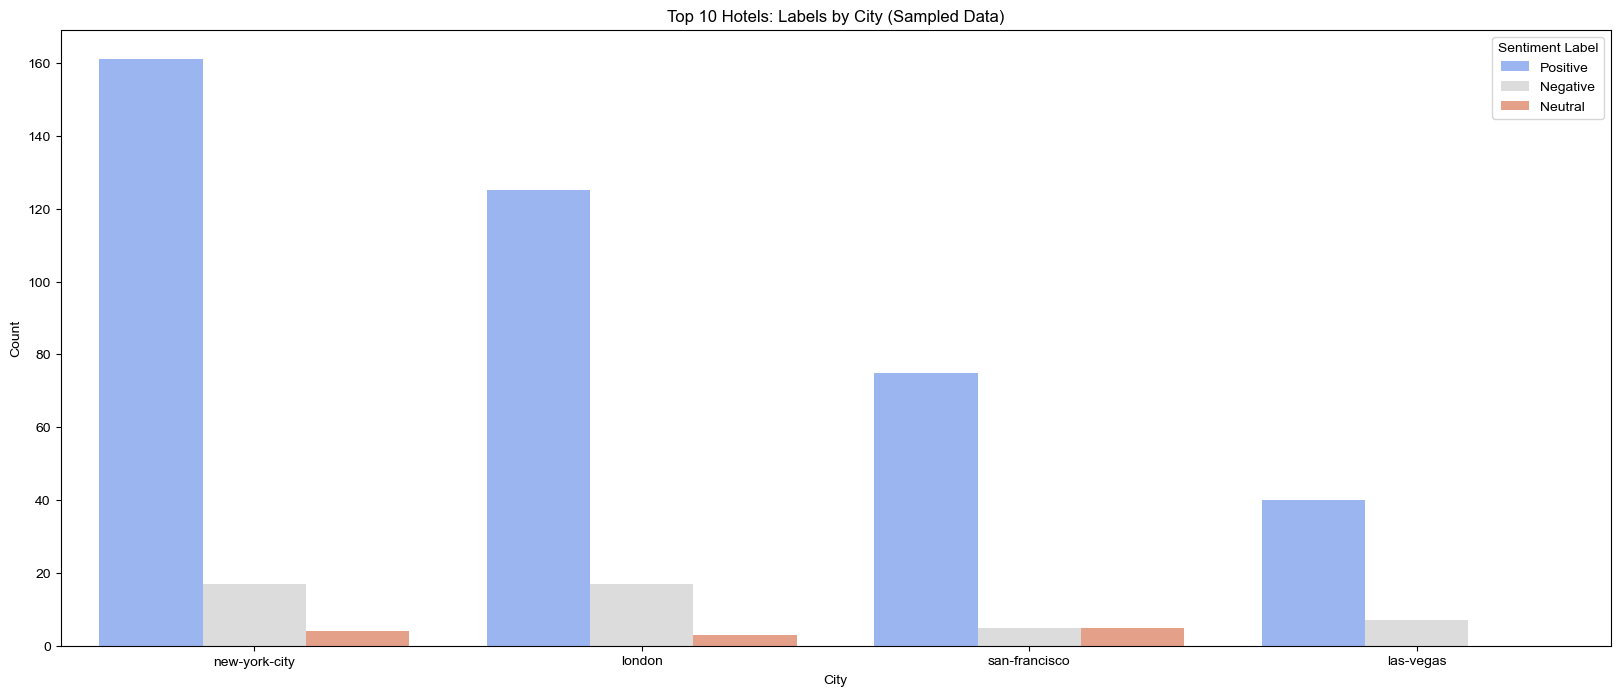

In [60]:
# EDA 4: Top 10 Hotels: Labels by City
plt.figure(figsize=(20, 8))
sns.countplot(x='City', hue='Label', data=df_top, palette='coolwarm')
plt.title('Top 10 Hotels: Labels by City (Sampled Data)')
plt.xlabel('City')
plt.ylabel('Count')
#plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment Label')

plt.show()

In [61]:
# EDA 5: Distribution of Review Length
df['Review_Length'] = df['Review'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

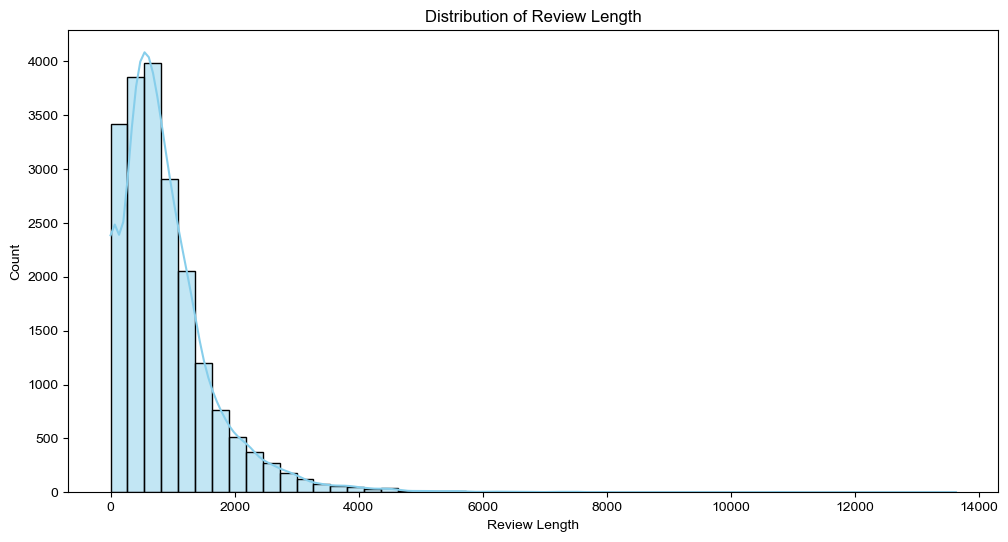

In [62]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Review_Length'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Review Length')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()

In [63]:
df.describe()

,Review_Length
count,20000.000000
mean,901.372600
std,821.824383
min,0.000000
25%,394.000000
50%,725.000000
75%,1191.000000
max,13629.000000


In [64]:
df['Sentiment'].value_counts()

0          1337
0.6249       66
0.5719       60
0.9951       49
0.9929       48
           ... 
0.478         1
-0.4188       1
-0.9632       1
0.1286        1
-0.7603       1
Name: Sentiment, Length: 4665, dtype: int64

In [65]:
df['City'].value_counts()
df['Hotel'].value_counts()
df['File_name'].value_counts()

uk_england_london_copthorne_tara_hotel_london_kensington    51
usa_new york city_le_parker_meridien                        49
uk_england_london_rubens_at_the_palace                      49
usa_nevada_las-vegas_riviera_hotel_casino                   47
usa_new york city_embassy_suites_hotel_new_york_city        45
                                                            ..
china_shanghai_hyatt_on_the_bund                             1
uk_england_london_pacific_hotel                              1
uk_england_london_travelodge_london_wimbledon                1
india_new delhi_pamposh_guest_house                          1
uk_england_london_chelsea_guest_house                        1
Name: File_name, Length: 2160, dtype: int64

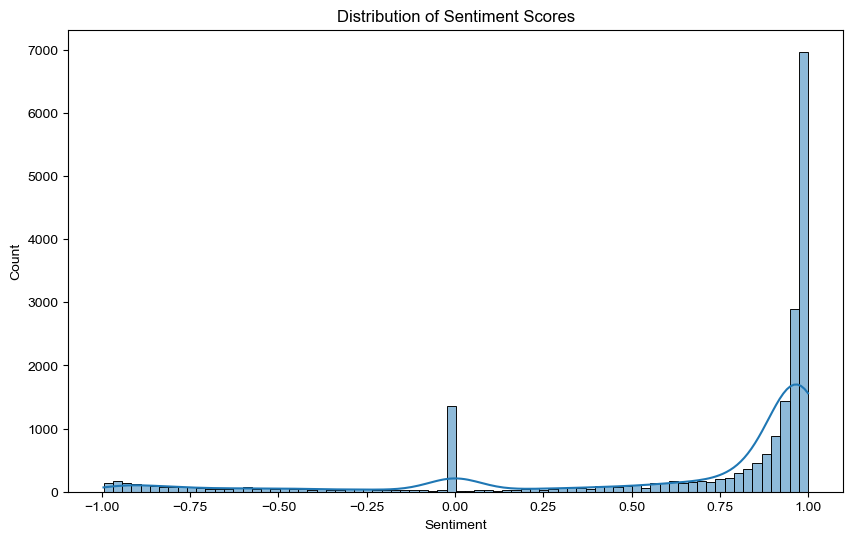

In [66]:
# Remove or replace problematic values
df['Sentiment'] = pd.to_numeric(df['Sentiment'], errors='coerce')  # Convert to numeric, coerce to NaN for non-numeric values

# Visualize the distribution of Sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df['Sentiment'].dropna(), kde=True)  # Drop NaN values for plotting
plt.title('Distribution of Sentiment Scores')
plt.show()


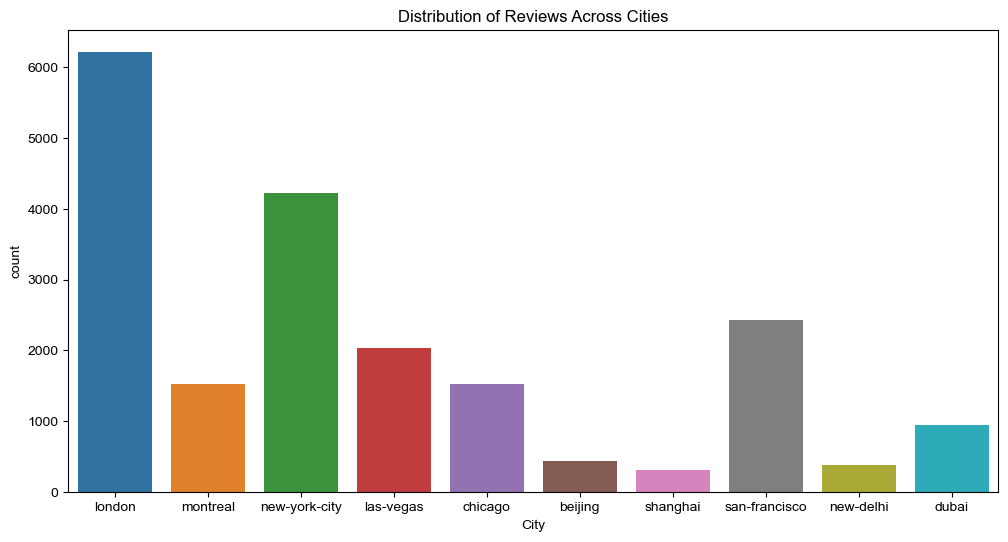

In [67]:
#Distribution of reviews across cities

plt.figure(figsize=(12, 6))
sns.countplot(x='City', data=df)
plt.title('Distribution of Reviews Across Cities')
plt.show()

In [68]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'City' is a non-numeric column
le = LabelEncoder()
df['City_encoded'] = le.fit_transform(df['City'])

# Now, compute the correlation matrix
numeric_columns = df.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

In [69]:
correlation_matrix

,Sentiment,Review_Length,City_encoded
Sentiment,1.000000,0.169387,0.018705
Review_Length,0.169387,1.000000,-0.034142
City_encoded,0.018705,-0.034142,1.000000


In [70]:
# Sentiment analysis using Naive Bayes
X = df['Review'].fillna('')
y = df['Label']

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

max_features = 10000
vectorizer = CountVectorizer(max_features=max_features)

# Fit and transform the 'Review' column
X = vectorizer.fit_transform(X)

# Use a sparse DataFrame
word_frequencies = pd.DataFrame.sparse.from_spmatrix(X, columns=vectorizer.get_feature_names_out())

# Display the DataFrame with word frequencies
print(word_frequencies)

       00  000  00am  00pm  01  02  03  04  05  06  ...  zayed  zealand  zen  \
0       0    0     0     0   0   0   0   0   0   0  ...      0        0    0   
1       0    0     0     0   0   0   0   0   0   0  ...      0        0    0   
2       0    0     0     0   0   0   0   0   0   0  ...      0        0    0   
3       0    0     0     0   0   0   0   0   0   0  ...      0        0    0   
4       0    0     0     0   0   0   0   0   0   0  ...      0        0    0   
...    ..  ...   ...   ...  ..  ..  ..  ..  ..  ..  ...    ...      ...  ...   
19995   0    0     0     0   0   0   0   0   0   0  ...      0        0    0   
19996   0    0     0     0   0   0   0   0   0   0  ...      0        0    0   
19997   0    0     0     0   0   0   0   0   0   0  ...      0        0    0   
19998   0    0     0     0   0   0   0   0   0   0  ...      0        0    0   
19999   0    0     0     0   0   0   0   0   0   0  ...      0        0    0   

       zero  zetter  zip  zone  zones  

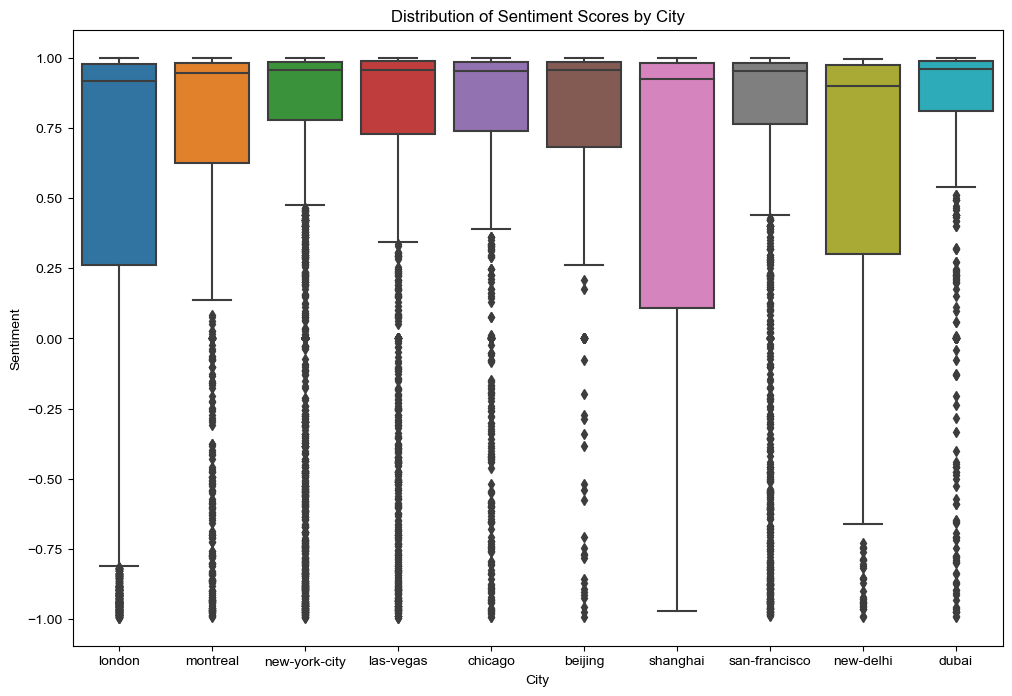

In [72]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='City', y='Sentiment', data=df)
plt.title('Distribution of Sentiment Scores by City')
#plt.xticks(rotation=45)
plt.show()

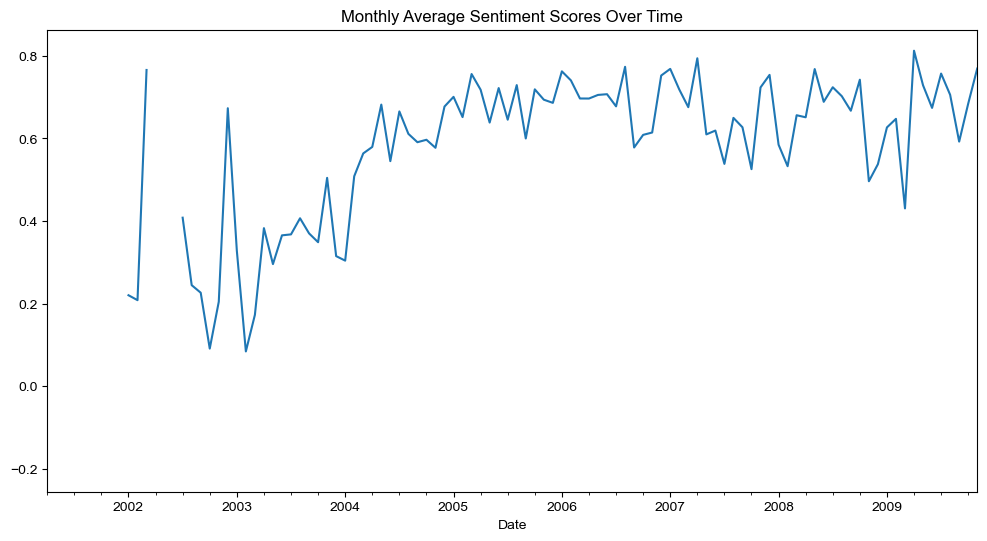

In [73]:
df['Date'] = pd.to_datetime(df['Date'], format="%b %d %Y", errors='coerce')
df.set_index('Date', inplace=True)
df['Sentiment'].resample('M').mean().plot(figsize=(12, 6))
plt.title('Monthly Average Sentiment Scores Over Time')
plt.show()

In [38]:
# Text preprocessing and feature extraction
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(X)

### Clustering

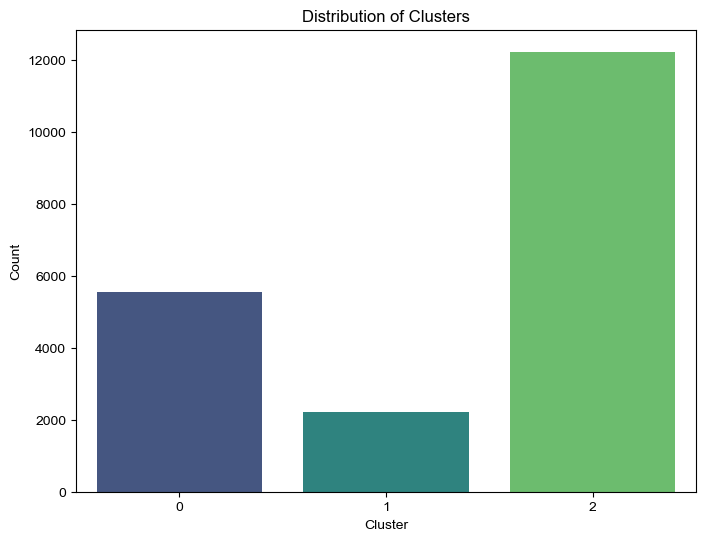


Cluster 0 reviews:
Review 1: The room is small, but it's very clean and cozy. the whole environment is so quiet and comfortable, with free breakfast of huge, the room charge is very reasonable. Especially, the location, we can get to St-catherina street which is main shopping and resto street in montreal just in 3 minutes on foot. And the staff is so friendly, good experience!!!

Review 2: We have been staying at this hotel for over 10 years regularly...this last visit was a disaster. Not just experienced by us, mind you, but also by the several other guests traveling for the same meeting. Three different groups had problems upon checking in! Everything from rooms not ready until late at night upon checking in; wrong rooms &amp; beds assigned; lack of concierge service; housekeeping not bringing in a cot for almost an hour when it should have been set up prior to our arrival, etc. Don't know what went wrong with this time, but we'll look elsewhere for our next trip. Also, note that th

In [74]:
# K-means clustering approach

# Reduce dimensionality for KMeans clustering using Truncated SVD
svd = TruncatedSVD(n_components=100)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

X_reduced = lsa.fit_transform(X)

# Apply KMeans clustering
num_clusters = 3 
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_reduced)

# Create a new DataFrame with the cluster labels
cluster_df = pd.DataFrame({'Cluster': kmeans.labels_})

# Reset index for both DataFrames
df.reset_index(drop=True, inplace=True)
cluster_df.reset_index(drop=True, inplace=True)

# Concatenate the new DataFrame with the original DataFrame
df = pd.concat([df, cluster_df], axis=1)

# Explore the distribution of clusters
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=df, palette='viridis')
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# Analyze the reviews in each cluster
for cluster_num in range(num_clusters):
    print(f"\nCluster {cluster_num} reviews:")
    cluster_reviews = df[df['Cluster'] == cluster_num]['Review'].head(5).values
    for i, review in enumerate(cluster_reviews, start=1):
        print(f"Review {i}: {review}\n")



Due to the challenges encountered in effectively labeling reviews through clustering, we have decided to rely solely on the labels generated through sentiment analysis for further analysis and classification.

### Classification

In [76]:
# Apply TF-IDF to the 'Review' column
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(df['Review'])

In [77]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=RANDOM_STATE)

# Split the data into training and Validation Sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=RANDOM_STATE)


Logistic Regression:
Accuracy: 0.8817
Precision: 0.7796
F1 Score: 0.7099

Decision Tree:
Accuracy: 0.8393
Precision: 0.6459
F1 Score: 0.6749

Random Forest:
Accuracy: 0.8245
Precision: 0.2748
F1 Score: 0.3013

AdaBoost:
Accuracy: 0.8553
Precision: 0.6758
F1 Score: 0.6557

Ridge Classifier:
Accuracy: 0.8850
Precision: 0.7809
F1 Score: 0.7235


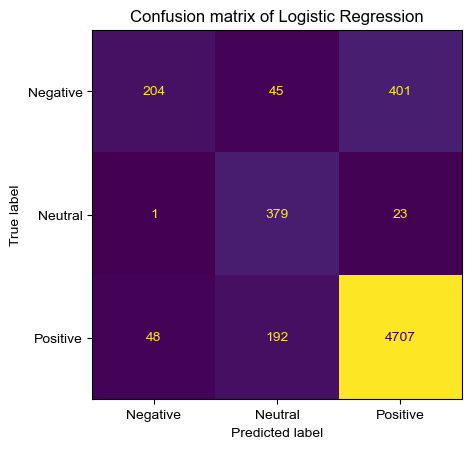

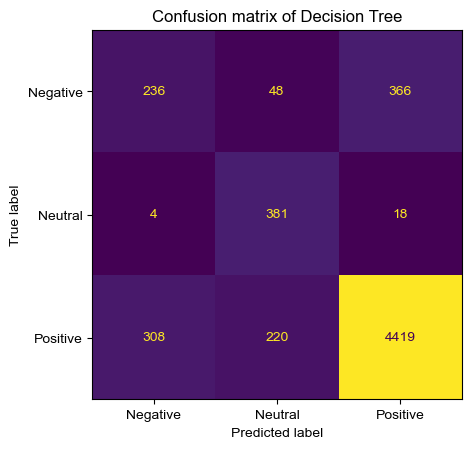

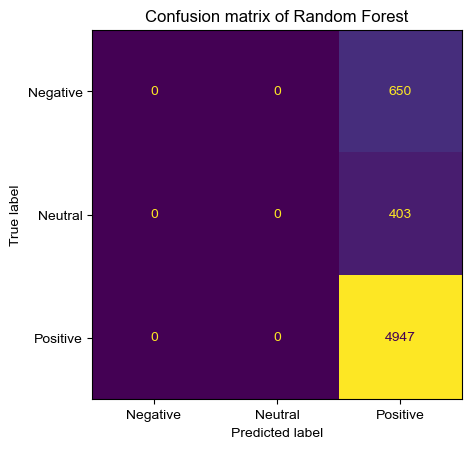

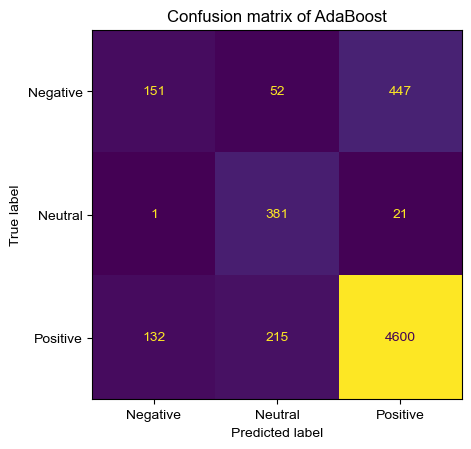

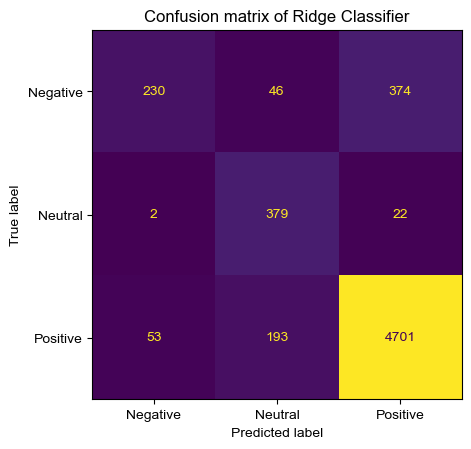

In [78]:
# Define and train classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, multi_class='multinomial'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(max_depth=10, n_jobs=-1),
    'AdaBoost': AdaBoostClassifier(),
    'Ridge Classifier': RidgeClassifier(alpha=1.0, solver="sparse_cg"),
    
                }

for name, classifier in classifiers.items():
    
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Make predictions
    predictions = classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='macro', zero_division=0)
    f1 = f1_score(y_test, predictions, average='macro', zero_division=0)
    print(f'\n{name}:\nAccuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nF1 Score: {f1:.4f}')
    title = 'Confusion matrix of ' + name
    disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predictions, colorbar=False);
    disp.ax_.set_title(title)
plt.show()

We will choose the Two best scoring model in terms of accuracy and hypertune them to improve the accuracy

#### Logistic regression

In [79]:
param_grid = [    
    {'penalty' : ['l1', 'l2'],
    'solver' : ['lbfgs','newton-cg','sag','saga'],
    }
]
RF_grid = GridSearchCV(LogisticRegression(max_iter=1000, multi_class='multinomial'), 
                           param_grid=param_grid) 
RF_grid.fit(X_train, y_train) 

GridSearchCV(estimator=LogisticRegression(max_iter=1000,
                                          multi_class='multinomial'),
             param_grid=[{'penalty': ['l1', 'l2'],
                          'solver': ['lbfgs', 'newton-cg', 'sag', 'saga']}])

In [80]:
RF_grid.best_estimator_

LogisticRegression(max_iter=1000, multi_class='multinomial', penalty='l1',
                   solver='saga')

#### Ridge Classifier

In [81]:
alpha = [0.1, 0.4, 0.5,0.8,1.0]
param_grid = dict(alpha=alpha)
RF_grid_Ridge = GridSearchCV(RidgeClassifier(), 
                           param_grid=param_grid) 
RF_grid_Ridge.fit(X_train, y_train) 

GridSearchCV(estimator=RidgeClassifier(),
             param_grid={'alpha': [0.1, 0.4, 0.5, 0.8, 1.0]})

In [82]:
RF_grid_Ridge.best_estimator_

RidgeClassifier(alpha=0.4)

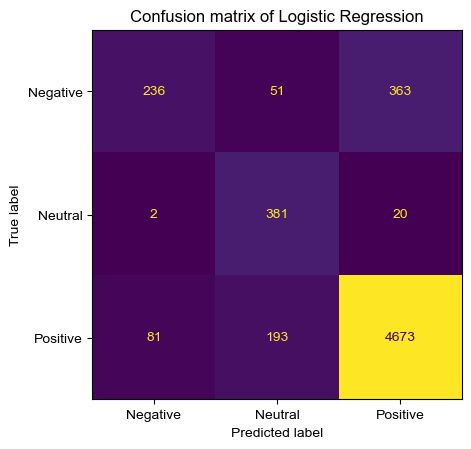

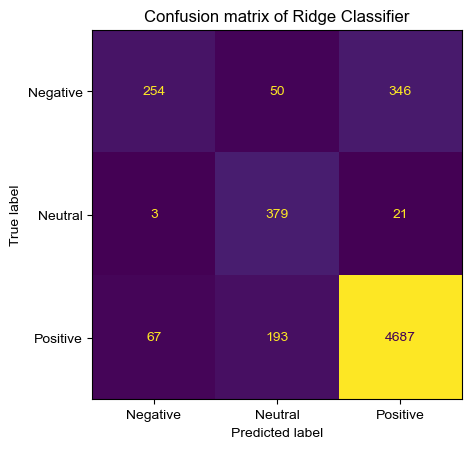

In [83]:
names = [
    'Logistic Regression',
    'Ridge Classifier'
        ]
classifiers = [
    LogisticRegression(max_iter=1000, multi_class='multinomial', penalty='l1',
                   solver='saga'),
    RidgeClassifier(alpha=0.5, solver="sparse_cg")
]
cols = ["name", "score", "f1","accuracy","precision","recall","specificity"] 

result = []
# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred, average=None)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    mcm = multilabel_confusion_matrix(y_test, y_pred)
    tn = mcm[:, 0, 0]
    tp = mcm[:, 1, 1]
    fn = mcm[:, 1, 0]
    fp = mcm[:, 0, 1]
    specificity = (tp / (tp + fn)).mean()
    result.append((name,score,f1,accuracy,precision,recall,specificity))
    title = 'Confusion matrix of ' + name
    disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar=False);
    disp.ax_.set_title(title)
plt.show()
result_df = pd.DataFrame(result, columns=cols)

In [84]:
result_df

,name,score,f1,accuracy,precision,recall,specificity
0,Logistic Regression,0.881667,"[0.48710010319917435, 0.7412451361867705, 0.93...",0.881667,0.757887,0.751033,0.751033
1,Ridge Classifier,0.886667,"[0.5215605749486653, 0.7395121951219511, 0.937...",0.886667,0.773553,0.759553,0.759553


Finally we will run the best of the two hypertuned model, i.e. Logistic Regression for the validation set and evaluate the metrics

In [85]:
RF_grid.best_estimator_

LogisticRegression(max_iter=1000, multi_class='multinomial', penalty='l1',
                   solver='saga')


Accuracy: 0.8983333333333333
Precision: 0.7858773942614348
F1 Score: [0.54573643 0.7628294  0.94455502]


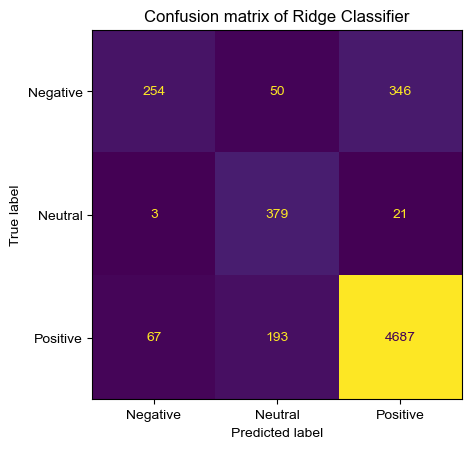

In [86]:
pred = RF_grid.best_estimator_.predict(X_val)
f1 = f1_score(y_val, pred, average=None)
accuracy = metrics.accuracy_score(y_val, pred)
precision = precision_score(y_val, pred, average='macro')
print(f'\nAccuracy: {accuracy}\nPrecision: {precision}\nF1 Score: {f1}')
title = 'Confusion matrix of ' + name
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, colorbar=False);
disp.ax_.set_title(title)
plt.show()

The final accuracy is 0.89 which is similar to the training accuracy, therefore we can conclude that the final model is optimized and there is no sign of underfitting or overfitting

### THANK YOU!